In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix



In [ ]:
from google.colab import files

In [ ]:
upload=files.upload()

Saving car_environment_quality.csv to car_environment_quality.csv


In [ ]:
df = pd.read_csv("car_environment_quality.csv")

In [ ]:
# Encode the target variable
df['Quality Rating'] = df['Quality Rating'].map({'Good': 2, 'Better': 1, 'Bad': 0})

# Split the data into features and target
X = df.drop('Quality Rating', axis=1)
y = df['Quality Rating']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Bad', 'Better', 'Good']))


Confusion Matrix:
[[ 6  0  0]
 [ 0  6  0]
 [ 0  0 13]]

Classification Report:
              precision    recall  f1-score   support

         Bad       1.00      1.00      1.00         6
      Better       1.00      1.00      1.00         6
        Good       1.00      1.00      1.00        13

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



In [ ]:
print(df['Quality Rating'].value_counts())


Quality Rating
2    50
1    36
0    35
Name: count, dtype: int64


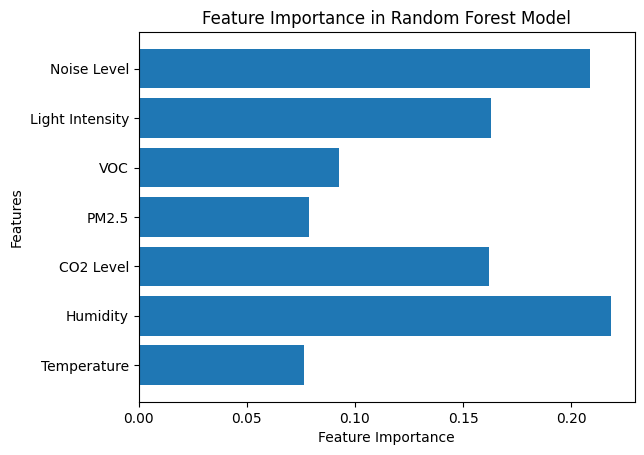

In [ ]:
import matplotlib.pyplot as plt

feature_importances = model.feature_importances_
features = X.columns
plt.barh(features, feature_importances)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest Model")
plt.show()


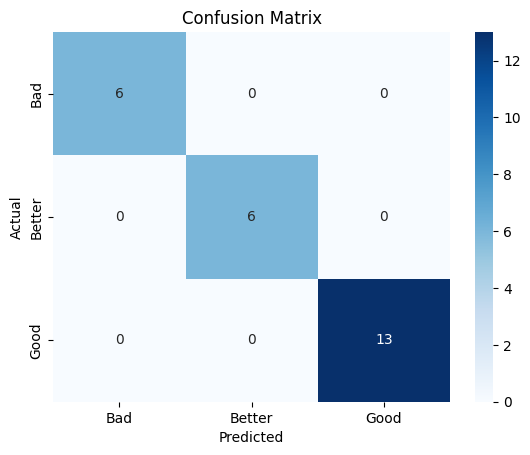

In [ ]:
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Bad', 'Better', 'Good'], yticklabels=['Bad', 'Better', 'Good'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

